<a href="https://colab.research.google.com/github/jtj7387/AI_2020_spring/blob/master/11_hello_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST 분류기**


In [1]:
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation 
from keras.utils import np_utils 

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # 데이터 받기

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape # 6만개의 데이터

(60000, 28, 28)

In [4]:
28*28 # 가로,세로가 28픽셀인 이미지 

784

In [5]:
Y_train.shape

(60000,)

In [6]:
Y_train[1] # 2번째 값 0

0

In [7]:
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784) 
X_train = X_train.astype('float32')    
X_test = X_test.astype('float32')    
X_train /= 255    
X_test /= 255

In [8]:
28*28 

784

In [9]:
Y_train[3] # 정답

1

In [10]:
classes = 10 # 10가지 숫자 학습
Y_train = np_utils.to_categorical(Y_train, classes)    
Y_test = np_utils.to_categorical(Y_test, classes) 

In [11]:
Y_train[3] # 컴퓨터의 학습형태, 확률을 보여줌

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
input_size = 784 # 입력값
batch_size = 100   
hidden_neurons = 400    
epochs = 5 # 5번만 학습

Hidden neuron이 있는 모델(정확도:98%)

In [13]:
model = Sequential()     
 
# 아래 test_mode 를 변경(0-->1, 혹은 1-->0)하고 해보세요. 마지막 정확도가 변하는지 확인해보세요 

test_mode = 0
 
if test_mode ==0:    
  model.add(Dense(hidden_neurons, input_dim=input_size))     
  model.add(Activation('relu'))         
  model.add(Dense(classes)) # classes는 10     
  model.add(Activation('softmax')) 
  
else:    
  model.add(Dense(classes, input_dim=input_size))    
  model.add(Activation('softmax'))



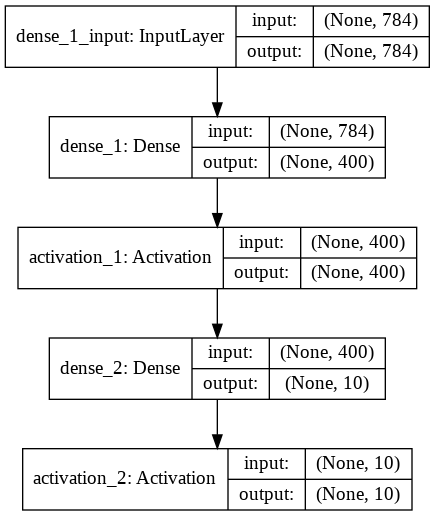

In [14]:
# 모델 그려주는 코드
# 784개를 넣어서 10개를  추출
# hidden neuron 이 있기 때문에 성능이 아래 모델보다 더 좋다.
from keras.utils import plot_model 
plot_model(model, to_file='model_mnist.png', show_shapes=True)

In [15]:
model.compile(loss='categorical_crossentropy',    
              metrics=['accuracy'], optimizer='adadelta')

In [16]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)
#91----------->98

Epoch 1/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2845 - accuracy: 0.9198
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.1232 - accuracy: 0.9641
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0851 - accuracy: 0.9755
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0640 - accuracy: 0.9816
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0505 - accuracy: 0.9854


In [17]:
score = model.evaluate(X_test, Y_test, verbose=1) 
print('\n''Test accuracy:', score[1])
#Test accuracy: 98% 

10000/10000 [==============================] - 0s 41us/step

Test accuracy: 0.9800999760627747


Hidden neuron이 없는 모델(정확도:92%)
-
-> 다양한 node(Hidden neuron)가 없기 때문에 성능이 떨어진다. 

In [18]:
model = Sequential()         
model.add(Dense(classes, input_dim=input_size))     
model.add(Activation('softmax')) 


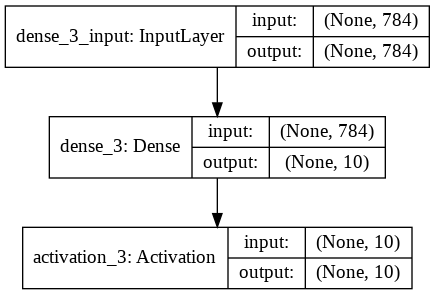

In [19]:
# 모델 그려주는 코드
# 784개를 넣어서 10개를 바로 추출
# hidden neuron 이 없기 때문에 성능이 떨어진다.
from keras.utils import plot_model 
plot_model(model, to_file='model_mnist.png', show_shapes=True)


In [20]:
model.compile(loss='categorical_crossentropy',    
              metrics=['accuracy'], optimizer='adadelta')


In [21]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

#85------------>91

Epoch 1/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.5940 - accuracy: 0.8523
Epoch 2/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3389 - accuracy: 0.9060
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3100 - accuracy: 0.9138
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.2966 - accuracy: 0.9174
Epoch 5/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.2885 - accuracy: 0.9200


In [22]:
score = model.evaluate(X_test, Y_test, verbose=1) 
print('\n''Test accuracy:', score[1]) 
#Test accuracy: 92%

10000/10000 [==============================] - 0s 19us/step

Test accuracy: 0.920199990272522
